In [25]:
import tweepy
import webbrowser
import time
import pandas as pd
import math
import json

In [2]:
consumer_key = '4VANzSEBgOaGefu8GIHVCKY8U'
consumer_secret = 'iIwXQJEqzlAAuOBl4toy05ngf94hu6HpqM96CbuCqgxT8c7mJy'

In [3]:
callback_url = 'oob'

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_url)

In [5]:
redirect_url = auth.get_authorization_url()
print(redirect_url)

https://api.twitter.com/oauth/authorize?oauth_token=BFuH2QAAAAABOqGjAAABeRvpdj0


In [6]:
webbrowser.open(redirect_url)

True

In [7]:
user_pin_input = input('Enter pin')

Enter pin7878889


In [8]:
auth.get_access_token(user_pin_input)

('1380915825268301830-XhRGG6DsXtRtwqW4xDvhuHJNlwovYF',
 'malyBIy1wetuhKD8SaztDD8E49LBeqNdW4JCLCUKBX3Zv')

In [9]:
api = tweepy.API(auth, wait_on_rate_limit=True)

In [105]:
F_NAME = 'retweet_data.json'
f_out = open(F_NAME, 'w')

In [106]:
def extract_tweets_as_df(status):
    columns = set()
    allowed_types = [str, int]
    tweets_data = []
    
    #for status in timeline_list:
    status_dict = dict(vars(status))
    hashtag = vars(status)['entities']['hashtags']
    if(len(hashtag) == 0 ):
        hashtag_val = None 
    else:
        hashtag_val = []
        for i in range(len(hashtag)):
            hashtag_val.append(hashtag[i]['text'])  
    keys = vars(status).keys()
    single_tweet = {"user": status.user.screen_name, "author":status.author.screen_name, "hashtags": hashtag_val}
    for k in keys:
        try:
            v_type = type(status_dict[k])
        except:
            v_type = None

        if v_type != None:
            if v_type in allowed_types:
                single_tweet[k] = status_dict[k]
                columns.add(k)

    tweets_data.append(single_tweet)

    header_cols = list(columns)
    header_cols.append('user')
    header_cols.append('author')
    header_cols.append('hashtags')
    df = pd.DataFrame(tweets_data, columns = header_cols)
    return df

In [107]:
user_list = ['@BJP4Bengal', '@DilipGhoshBJP', '@SuvenduWB', '@AITCofficial', '@MamataOfficial', '@cpimspeak', '@SitaramYechury', '@INCWestBengal', '@aimim_national', '@derekobrienmp', '@DidiKeBolo', '@MahuaMoitra', '@tathagata2', '@Sujan_Speak']

In [108]:
i=0
for status in tweepy.Cursor(api.user_timeline, screen_name= user_list[0], tweet_mode="extended").items(500):
    print(user_list[0])
    #for retweet network
    tweet = status._json
    if tweet.get('retweeted_status'):
        #print("Yes")
        json.dump(tweet, f_out)
        f_out.write('\n')
    # ------------------    
    if(i==0):    
        df = extract_tweets_as_df(status)
    else:
        df_new = extract_tweets_as_df(status)
        df = df.append(df_new, ignore_index=True)
    i+=1

for user in user_list[1:]:
    print(user)
    for status in tweepy.Cursor(api.user_timeline, screen_name= user, tweet_mode="extended").items(500):
        #for retweet network
        tweet = status._json
        if tweet.get('retweeted_status'):
            json.dump(tweet, f_out)
            f_out.write('\n')
        # ------------------ 
        df_new = extract_tweets_as_df(status)
        df = df.append(df_new, ignore_index=True)

@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP4Bengal
@BJP

In [110]:
f_out.close()
# save df
filename = 'tweet_dataset.csv'
df.to_csv(filename)

In [111]:
#['WestBengalElections2021', 'ElectionCommissionOfIndia', 'TMC', 'BJP', 'INC', 'CPI', 'CPIM', 'AIMIM']
def extract_hashtag_from_string(hashtags):
    tag_string = hashtags[1:len(hashtags)-1]
    hashtag_list = tag_string.split(", ")
    final_hashtag_list = []
    for hashtag in hashtag_list:
        hashtag = hashtag[1:len(hashtag)-1]
        final_hashtag_list.append(hashtag)
    return final_hashtag_list

In [112]:
filename = './tweet_dataset.csv'
df1 = pd.read_csv(filename)
hashtag_list = []

for hashtags in df1['hashtags']:
    if(type(hashtags) != float): #to avoid nan
        #print(hashtags)
        hashtags = extract_hashtag_from_string(hashtags)
        hashtag_list.extend(hashtags)

In [117]:
hashtag_freq = {}
for hashtag in hashtag_list:
    #print(hashtags)
    #removing hashtag about 'USPresidentialElections2020' tweets done by @LSElections2024 and tweets for Bihar and Delhi elections
    if(hashtag == 'RJD' or hashtag == 'LJP' or hashtag == 'RLSP' or hashtag.find('TamilNadu') != -1 or hashtag.find('Bihar') != -1 or hashtag.find('US') != -1 or hashtag.find('Delhi') != -1 or hashtag == 'बिहारविधानसभाचुनाव' or hashtag == 'AAP' or hashtag == 'बिहार_विधानसभा_निर्वाचन_प्रथम_चरण'):
        continue
    if(hashtag not in hashtag_freq.keys()):
        hashtag_freq[hashtag]=1
    else:
        hashtag_freq[hashtag]+=1
                
hashtag_freq = dict(sorted(hashtag_freq.items(), key=lambda item: item[1], reverse=True))  
print(hashtag_freq)

{'MegaPublicRally': 75, 'TMC200Paar': 73, 'LokhhoSonarBangla': 71, 'Vote4AsolPoriborton': 67, 'VoteForTMC': 66, 'Nandigram': 63, 'ModiMadeDisaster': 50, 'COVID19': 48, 'EbarBJPEbarSonarBangla': 47, 'BanglaAcheModiJirSathe': 47, 'BanglaChayBJPKe': 46, 'MegaRoadShow': 46, 'EiBaarBJPSarkar': 41, 'NoVoteToBJP': 34, 'EbarBJP': 31, 'WestBengalElections2021': 29, 'BengalElection2021': 29, 'Bengal': 28, 'BanglaNijerMeyekeiChay': 28, 'KisanMazdoorPadyatra': 28, 'SonarBanglaSonkolpoPotro': 26, 'Vote4Left': 25, 'LDFforSure': 25, 'BohiragotoChaiNa': 24, 'Vote4SanjuktaMorcha': 24, 'ModiHataoDeshBachao': 22, 'EbarBJPSorkar': 19, 'MegaPublicMeeting': 19, 'GarjeNaari': 19, 'Didir10Ongikar': 18, 'PeoplesBrigade': 18, 'COVIDEmergency2021': 18, 'BanglarManushBJPErSathe': 17, 'MamataBanerjee': 17, 'Kolkata': 17, 'FighterDidi': 16, 'SonarBangla': 15, 'BengalElections2021': 15, 'WBWelcomesRahulGandhi': 15, 'Bangla': 14, 'SanjuktaMorcha': 14, 'PMDoesNotCare': 13, 'KhelaHobe': 13, 'IndiaAgainstLPGLoot': 13, '

In [124]:
import matplotlib.pyplot as plt

In [125]:
vals = [key for key in hashtag_freq.keys()]
#print(in_vals)
hist = [hashtag_freq[key] for key in hashtag_freq.keys()]

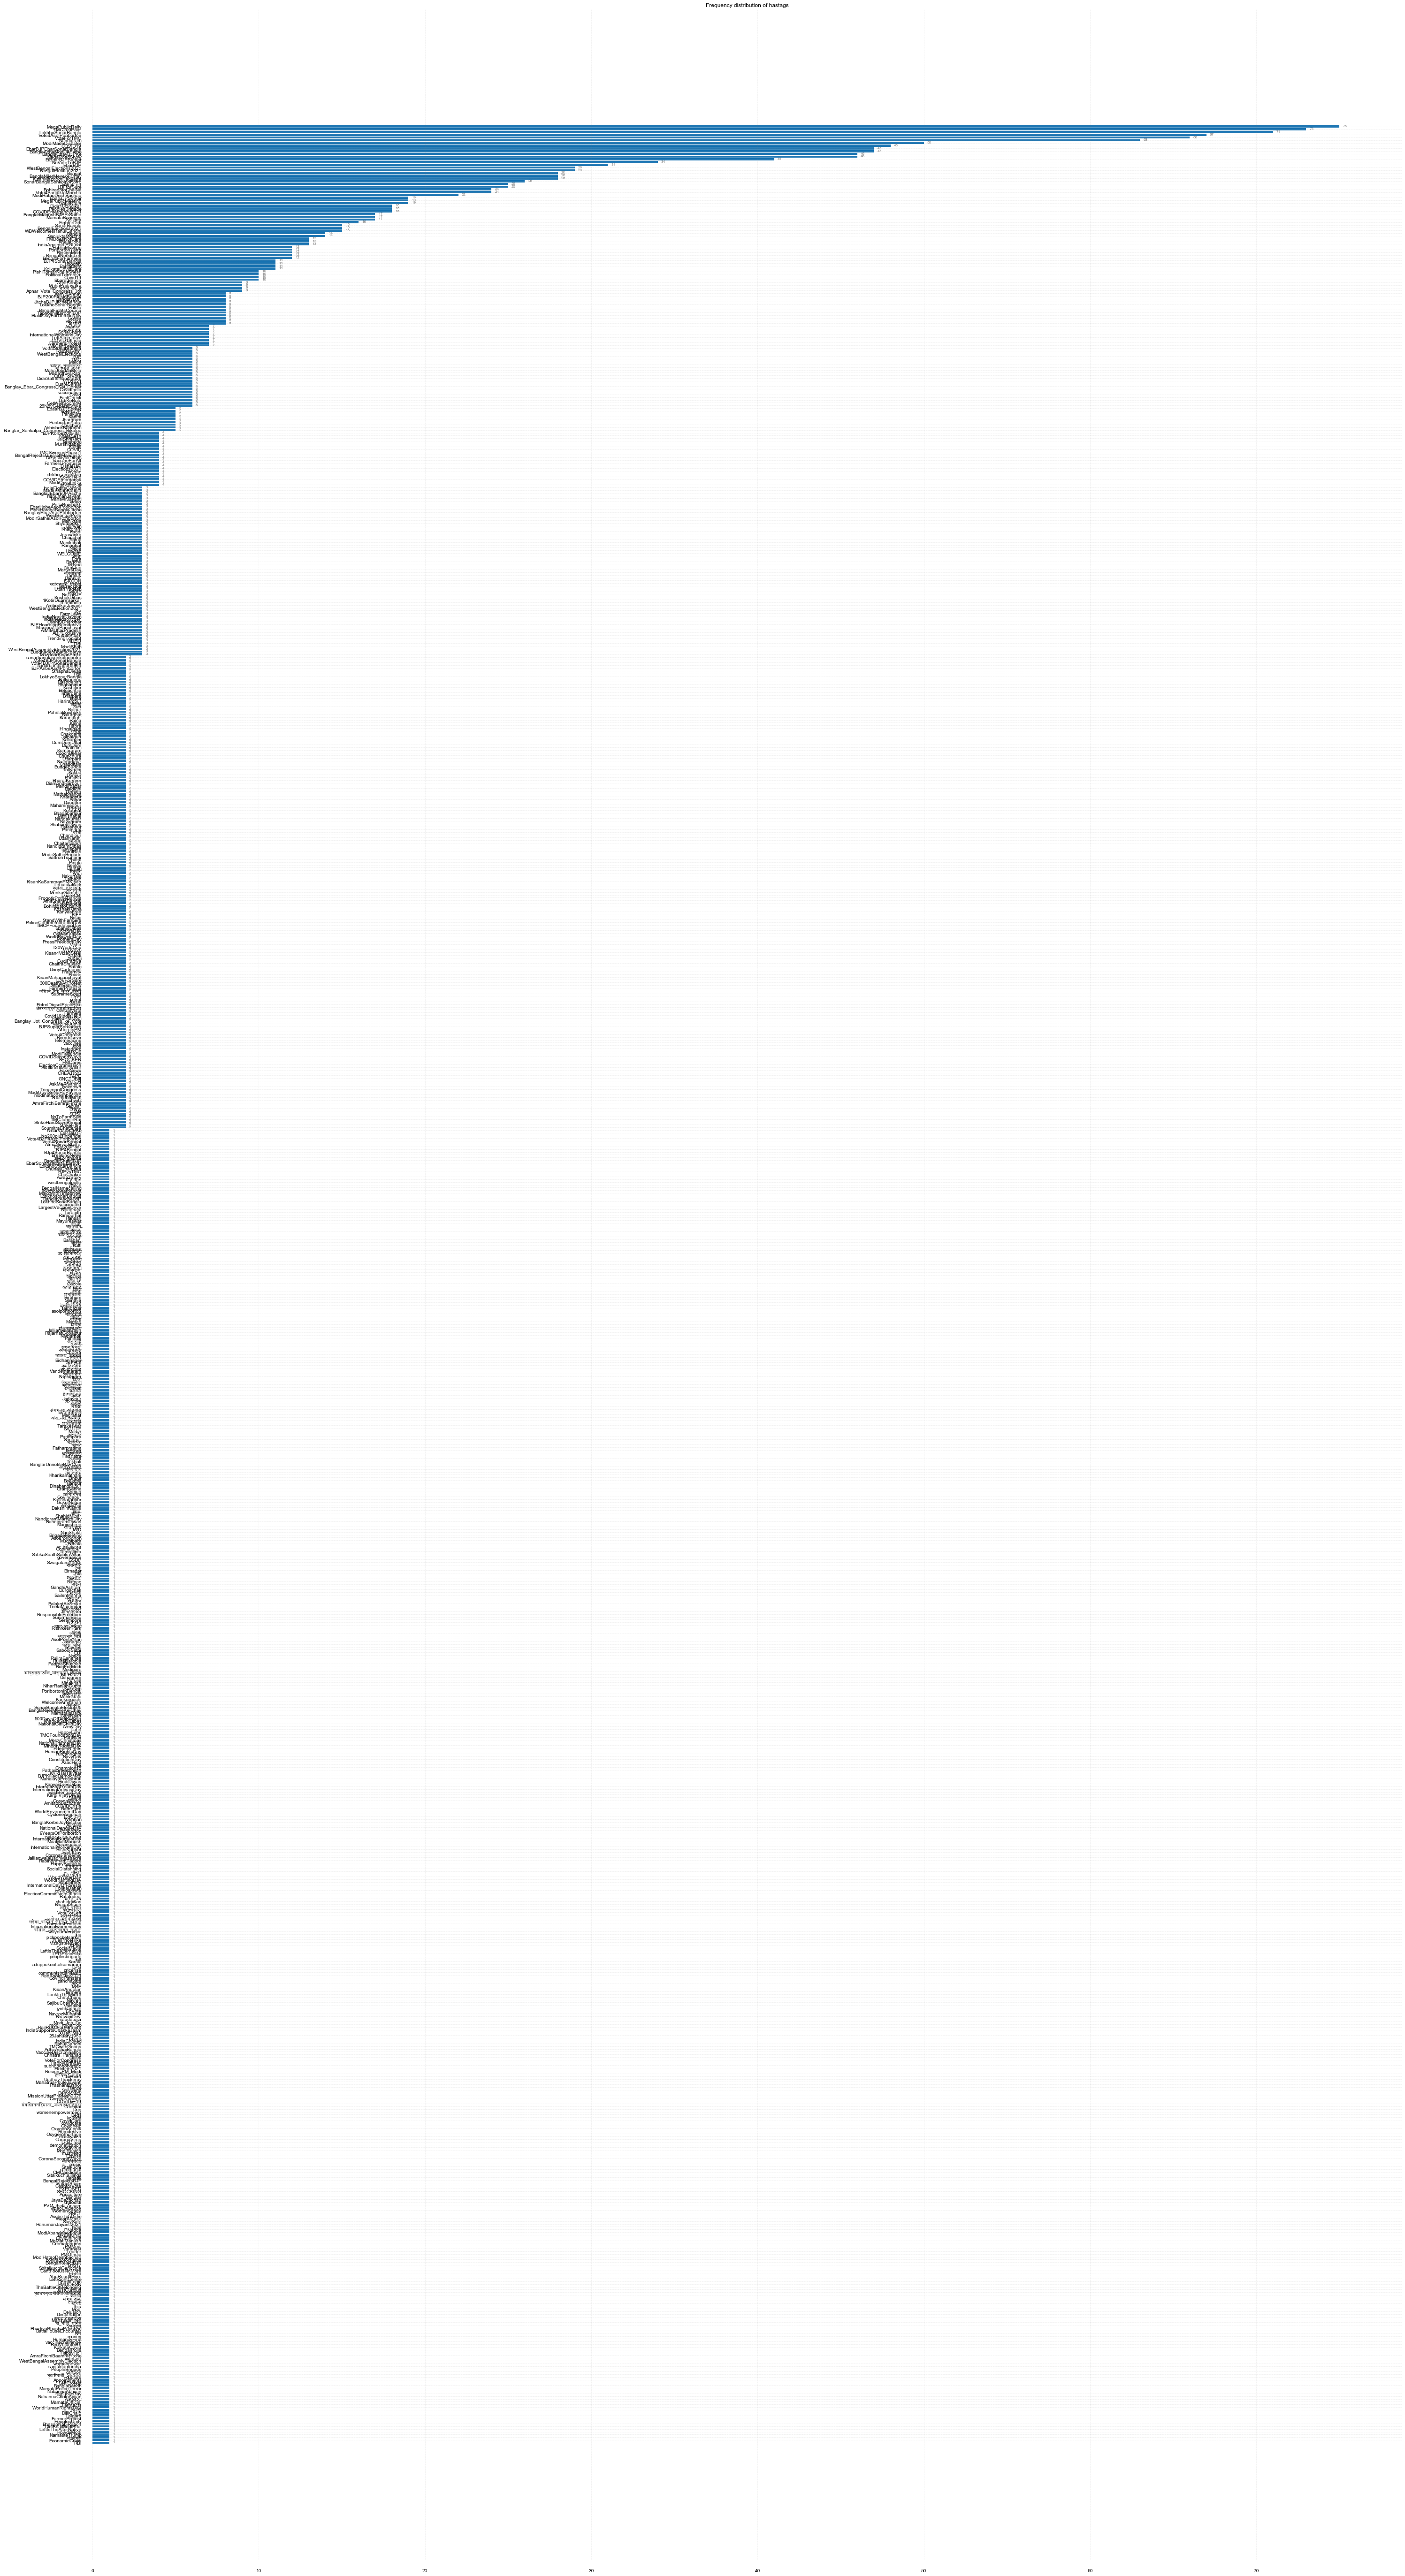

In [131]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['Source Han Sans TW',
                                   'sans-serif',
                                   'Arial Unicode MS'  # fc-list :lang=hi family
                                   ]
# Figure Size
fig, ax = plt.subplots(figsize =(50, 100))
 
# Horizontal Bar Plot
ax.barh(vals, hist)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 15)
ax.yaxis.set_tick_params(pad = 20)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 8, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title("Frequency distribution of hastags")
 
# Show Plot
plt.savefig('./hashtag_frequency_distribution.pdf')

In [123]:
#print top-k hashtags 
def top_k_hashtags(hashtag_freq, k):
    count = 0
    print('Top - ', k, ' hashtags are : ')
    for keys in hashtag_freq.keys():
        print(keys, " : ", hashtag_freq[keys])
        if(count == 20):
            break
        count+=1

top_k_hashtags(hashtag_freq, 20)

Top -  20  hashtags are : 
MegaPublicRally  :  75
TMC200Paar  :  73
LokhhoSonarBangla  :  71
Vote4AsolPoriborton  :  67
VoteForTMC  :  66
Nandigram  :  63
ModiMadeDisaster  :  50
COVID19  :  48
EbarBJPEbarSonarBangla  :  47
BanglaAcheModiJirSathe  :  47
BanglaChayBJPKe  :  46
MegaRoadShow  :  46
EiBaarBJPSarkar  :  41
NoVoteToBJP  :  34
EbarBJP  :  31
WestBengalElections2021  :  29
BengalElection2021  :  29
Bengal  :  28
BanglaNijerMeyekeiChay  :  28
KisanMazdoorPadyatra  :  28
SonarBanglaSonkolpoPotro  :  26
